In [970]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')


In [971]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum column size to be displayed
pd.set_option('display.max_columns',159)

# Set the maximum row size to be displayed
pd.set_option('display.max_rows', 500)


# <font color = black> Credit EDA Case Study </font>


##  Task 1: Analysing current applications

- ### Subtask 1.1: Read the current applications Data.

    Read the application data file provided and store it in a dataframe `current_applications`.

In [972]:
# Read the application data csv file using 'read_csv'. Store into a dataframe 'current_applications'
current_applications=pd.read_csv(r'C:\Users\innov\Desktop\Masters\eda_case_study\application_data.csv')

# Inspect the dataframe
current_applications.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [973]:
# Check the number of rows and columns in the dataframe - current_applications
current_applications.shape


(307511, 122)

In [974]:
# Check the column-wise info of the dataframe - current_applications
current_applications.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [975]:
# Check the summary for the numeric columns in the dataframe - current_applications
current_applications.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

- ### Subtask 1.2: Data Quality Check & Missing Values in current applications

    Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let us start with some data quality check and finding missing values

<b>Gender field</b>

In [976]:
# Let's check the gender field. Show the gender-wise count of records
current_applications.CODE_GENDER.value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

We can see that there are 4 records which has gender as XNA. We can delete the records with gender XNA as the number of records with XNA is less, and it will not be useful for analysis

We can drop the records having gender as XNA using the below code:

current_applications = current_applications[current_applications.CODE_GENDER!='XNA']


In [977]:
# Re-check the gender-wise count of records
current_applications.CODE_GENDER.value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Now, we can see that there is not any count for XNA. Gender is now having just 2 values F(Female) and M(Male) which can be useful for analyzing the data

In [978]:
# Convert F to Female & M to Male for better understanding of terms
current_applications.CODE_GENDER.replace('F','Female',inplace=True)
current_applications.CODE_GENDER.replace('M','Male',inplace=True)


In [979]:
# Re-check whether the F and M are replced with Female and Male
current_applications.CODE_GENDER.head(2)


0      Male
1    Female
Name: CODE_GENDER, dtype: object

We can see above that the terms F and M are replaced with Female and Male. So, now the gender column is cleaner.


<b>Age field</b>

In [980]:
# Convert the Bith in Days to age in years. Also, convert all negative values to positive
age = abs(current_applications.DAYS_BIRTH)//365.25


In [981]:
# Check to see the maximum and minimum values of age
age.describe()


count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

We can see that the minimum age is 20 whereas maximum age is 69. Therefore, we can create age group categories between 20 to 70

In [982]:
# Create a new column AGE_GROUP and arrange the values in bins in the range of 10 between 20 to 70.
current_applications['AGE_GROUP'] = pd.cut(age,bins=np.arange(20,71,10))


In [983]:
# Check the number of age group categories created.
current_applications.AGE_GROUP.unique().sort_values()


[(20, 30], (30, 40], (40, 50], (50, 60], (60, 70], NaN]
Categories (5, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

We can see that the 5 age group categories have been created


<b>Income field</b>

In [984]:

current_applications['AMT_INCOME_TOTAL'].quantile([0,0.2,0.4,0.6,0.8,1])


0.0        25650.0
0.2        99000.0
0.4       135000.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [985]:
# Create a new column INCOME_GROUP and arrange the values in bins in the range of 0.2 between 0 to 1.
current_applications['INCOME_GROUP']=pd.qcut(current_applications['AMT_INCOME_TOTAL'], 
                                             q=[0,0.2,0.4,0.6,0.8,1], 
                                             labels=['Very Low','Low','Medium','High','Very High'])


In [986]:
# Check the number of income group categories created.
current_applications.INCOME_GROUP.unique().sort_values()


[Very Low, Low, Medium, High, Very High]
Categories (5, object): [Very Low < Low < Medium < High < Very High]

We can see that the 4 income group categories have been created


<b>Fields with missing values</b>

In [987]:
# Checking the columns having more than 50% missing values
missing_values = current_applications.isnull().mean()*100

# Sort and verify the % of missing value columns
missing_values.sort_values(ascending=False).head(50)


COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

As per the above inspection, there are many columns having more than 50% missing values. Therefore, we need to remove those columns from dataframe as those columns may not be useful during analysis as most of their data is missing


In [988]:
# Removing all the columns having more that 50% missing values
current_applications = current_applications.loc[:,missing_values<=50]


In [989]:
# Re-checking the shape of current_applications dataframe to check the number of available columns after removing columns
current_applications.shape


(307511, 83)

We can see the above that number of columns reduced from 122 to 82 after removing the fields having more than 50% missing values

In [990]:
# Re-checking the columns for columns having more than 50% missing values
missing_values = current_applications.isnull().mean()*100

# Sort and verify the % of missing value columns
missing_values.sort_values(ascending=False).head()


FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
dtype: float64

As per the above inspection, we can see that now there is not any columns having more than 50% missing values. So, we are good with this now.


In [991]:
# Checking columns with less than 13% missing values
current_applications.columns[(missing_values<=13) & (current_applications.isnull().mean()>0)]


Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE_GROUP'],
      dtype='object')

We need to check the above columns for possible imputations required. We are going to analyze few of these fields


<b>Annuity Amount</b>


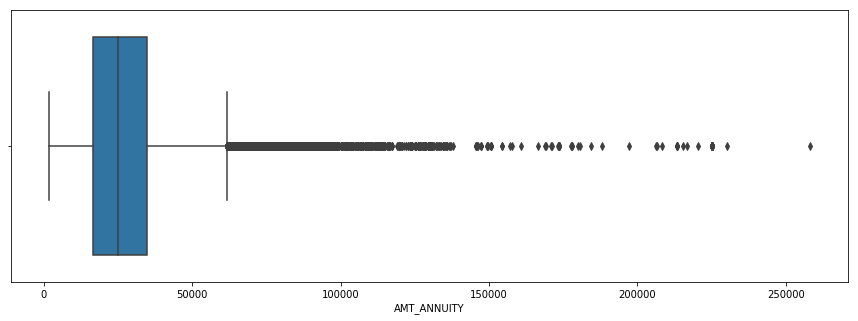

In [992]:
# Plot a boxplot to check the outliers
plt.figure(figsize=[15,5])
sns.boxplot(current_applications['AMT_ANNUITY'])
plt.show()


We can clearly see outliers and therefore any imputation on this field should be done using median


<b>Goods Price</b>


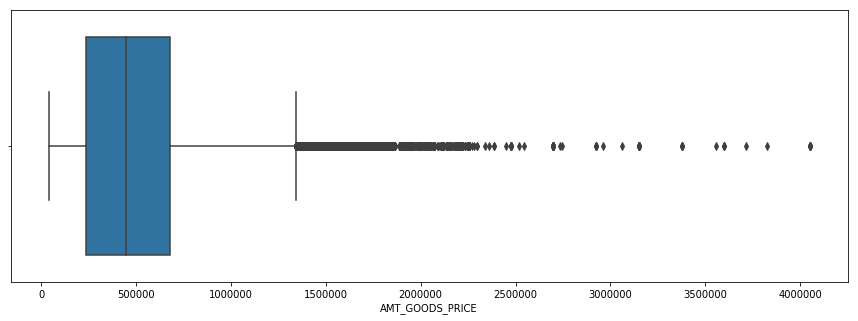

In [993]:
# Plot a boxplot to check the outliers
plt.figure(figsize=[15,5])
sns.boxplot(current_applications['AMT_GOODS_PRICE'])
plt.show()


We can clearly see outliers and therefore any imputation on this field should be done using median


<b>Family Members</b>


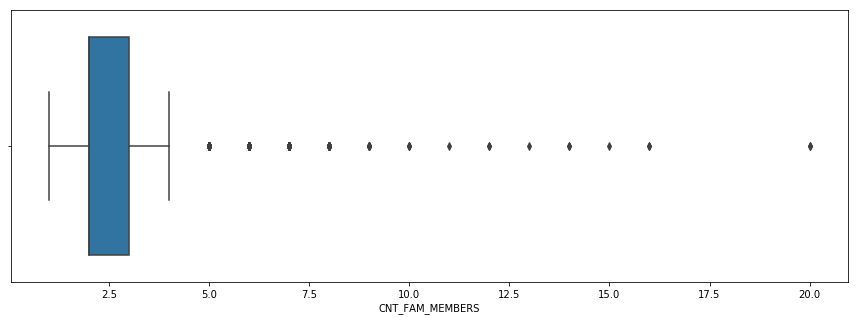

In [994]:
# Plot a boxplot to check the outliers
plt.figure(figsize=[15,5])
sns.boxplot(current_applications['CNT_FAM_MEMBERS'])
plt.show()


We can clearly see outliers and therefore any imputation on this field should be done using median


<b>External Source 2</b>


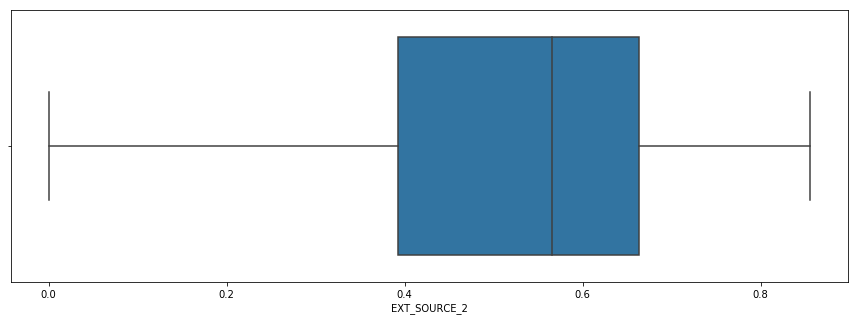

In [995]:
# Plot a boxplot to check the outliers
plt.figure(figsize=[15,5])
sns.boxplot(current_applications['EXT_SOURCE_2'])
plt.show()


We cannot see any outliers and therefore imputation on this field should be done using mean


- ### Subtask 1.3:  Data analysis on current applications

    Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualization to get various insights about the data.


<b> Proportion of Defaulters</b>


In [996]:
# Check the proportion of defaulters in current applications
current_applications.TARGET.value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

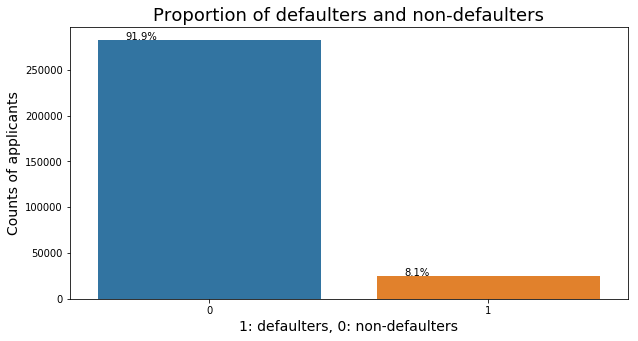

In [997]:
# Create sublots with 1 plot placeholders
fig,ax = plt.subplots(1,figsize=(10,5))

# Target wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=current_applications.TARGET, data=current_applications, ax=ax)

# Set the title of the defaulter's plot
ax.set_title('Proportion of defaulters and non-defaulters',fontsize=18)

# Set the label of x-axis for defaulter's plot
ax.set_xlabel('1: defaulters, 0: non-defaulters', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax.set_ylabel('Counts of applicants', fontsize=14)

# Annotate the percentage of each bar
for a in ax.patches:
        ax.annotate('{:.1f}%'.format((a.get_height()/len(current_applications))*100), (a.get_x()+0.1, a.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see that the number defaulters are very less compared to non-defaulters</li>
</ul>


<b>Split the list of defaulters and non-defaulters in tow separate dataframes for further analysis</b>


In [998]:
# Create a dataframe of defaulters
df_defaulters=current_applications[current_applications.TARGET==1]

# Create a dataframe of Non-defaulters
df_non_defaulters=current_applications[current_applications.TARGET==0]


<b>Gender proportions of defaulters and non-defaulters</b>


In [999]:
# Check the gender wise counts in current applications
current_applications.CODE_GENDER.value_counts()


Female    202448
Male      105059
XNA            4
Name: CODE_GENDER, dtype: int64

In [1000]:
# Check the gender wise counts of defaulters
df_defaulters.CODE_GENDER.value_counts()


Female    14170
Male      10655
Name: CODE_GENDER, dtype: int64

In [1001]:
# Check the gender wise counts of non-defaulters
df_non_defaulters.CODE_GENDER.value_counts()


Female    188278
Male       94404
XNA            4
Name: CODE_GENDER, dtype: int64

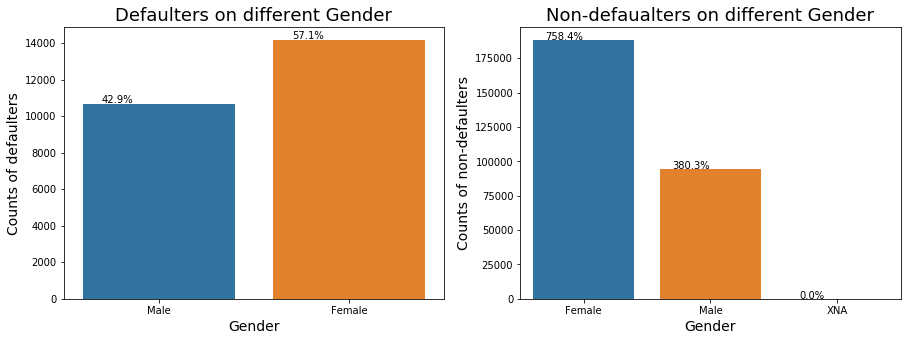

In [1002]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

# Gender wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=df_defaulters.CODE_GENDER, data=df_defaulters, ax=ax1)

# Set the title of the defaulter's plot
ax1.set_title('Defaulters on different Gender',fontsize=18)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Gender', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Counts of defaulters', fontsize=14)

# Annotate the percentage of each bar
for ax in ax1.patches:
        ax1.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Gender wise count plot for non-defaulters and place it in the second placeholder
sns.countplot(x=df_non_defaulters.CODE_GENDER, data=df_non_defaulters, ax=ax2)

# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaualters on different Gender',fontsize=18)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Gender', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Counts of non-defaulters', fontsize=14)

# Annotate the percentage of each bar
for ax in ax2.patches:
        ax2.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see that the number of females is more in both the categories. It means that the loan applications of female applicants are more irrespective of their defaulter status</li>
  <li>We can also see that the greater number of females are non-defaulter than defaulter</li>
  <li>Based on the above inference, we can say that the trend in defaulting is more in males than females</li>
</ul>


<b>Age-Group proportions of defaulters and non-defaulters</b>


In [1003]:
# Check the age group wise counts in current applications
current_applications.AGE_GROUP.value_counts()


(30, 40]    83212
(40, 50]    74347
(50, 60]    67864
(20, 30]    52963
(60, 70]    29124
Name: AGE_GROUP, dtype: int64

In [1004]:
# Check the age group wise counts of defaulters
df_defaulters.AGE_GROUP.value_counts()


(30, 40]    7719
(20, 30]    6034
(40, 50]    5617
(50, 60]    4024
(60, 70]    1431
Name: AGE_GROUP, dtype: int64

In [1005]:
# Check the age group wise counts of non-defaulters
df_non_defaulters.AGE_GROUP.value_counts()


(30, 40]    75493
(40, 50]    68730
(50, 60]    63840
(20, 30]    46929
(60, 70]    27693
Name: AGE_GROUP, dtype: int64

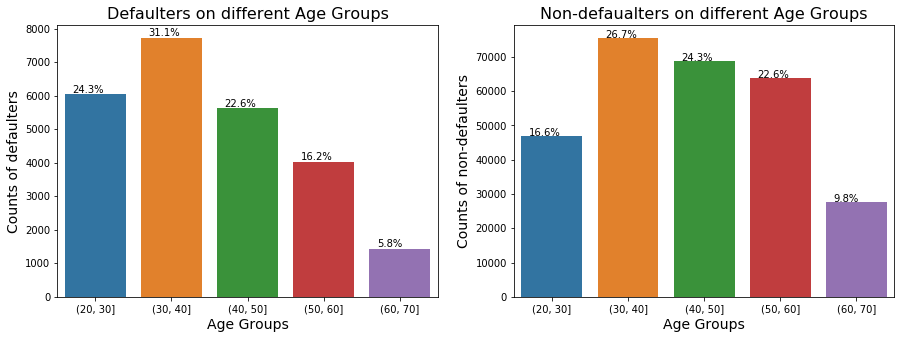

In [1006]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

# Age group wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=df_defaulters.AGE_GROUP, data=df_defaulters, ax=ax1)

# Set the title of the defaulter's plot
ax1.set_title('Defaulters on different Age Groups',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Age Groups', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Counts of defaulters', fontsize=14)
for ax in ax1.patches:
        ax1.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))


# Age group wise count plot for non-defaulters and place it in the second placeholder
sns.countplot(x=df_non_defaulters.AGE_GROUP, data=df_non_defaulters, ax=ax2)

# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaualters on different Age Groups',fontsize=16)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Age Groups', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Counts of non-defaulters', fontsize=14)
for ax in ax2.patches:
        ax2.annotate('{:.1f}%'.format((ax.get_height()/len(df_non_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see that the age group between 30 to 40 are more likely to become defaulters. This may be due to that fact that people are having multiple loans at this age group and having more household responsibilities which makes exceedingly difficult for this age group to make the timely repayments of all</li>
  <li>We can also see that the age group between 60-70 are less likely to become defaulter. This may be because this age group is having pensions and more savings with reduced responsibilities which makes it less difficult for this age group to make the loan repayments </li>
  <li>Based on the above inference, we can say that the trend in defaulting is decreasing with the increase in the age group after 30 years</li>
</ul>


<b>Income Type proportions of defaulters and non-defaulters</b>

In [1007]:
# Count of all income types in current applications
current_applications.NAME_INCOME_TYPE.value_counts()


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [1008]:
# Count of all income types among defaulters
df_defaulters.NAME_INCOME_TYPE.value_counts()


Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [1009]:
# Count of all income types among non-defaulters
df_non_defaulters.NAME_INCOME_TYPE.value_counts()


Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

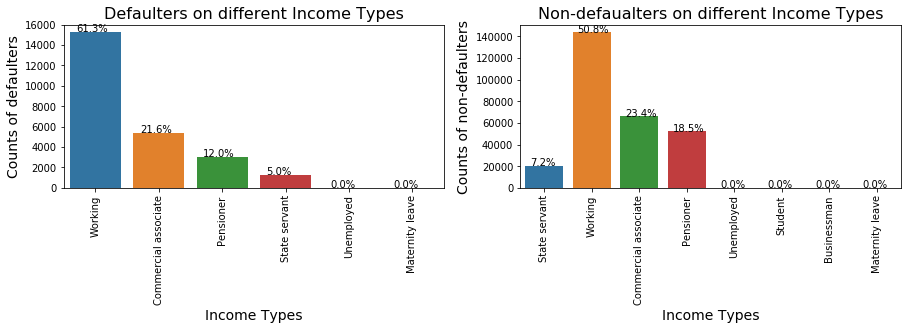

In [1010]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3))

# Income type wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=df_defaulters.NAME_INCOME_TYPE, data=df_defaulters, ax=ax1)

# Set the title of the defaulter's plot
ax1.set_title('Defaulters on different Income Types',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Income Types', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Counts of defaulters', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Annotate the percentage of each bar
for ax in ax1.patches:
        ax1.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Income type count plot for non-defaulters and place it in the second placeholder
sns.countplot(x=df_non_defaulters.NAME_INCOME_TYPE, data=df_non_defaulters, ax=ax2)

# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaualters on different Income Types',fontsize=16)

# Rotate the labels of x-axis in non-defaulter's plot for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Income Types', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Counts of non-defaulters', fontsize=14)

# Annotate the percentage of each bar
for ax in ax2.patches:
        ax2.annotate('{:.1f}%'.format((ax.get_height()/len(df_non_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see from both the categories that working people are applying more for loans. We can also see that the working people are more likely to become defaulters</li>
  <li>We can clearly see that the students are not in the defaulter list. May be this is because students do not pay the installments during their studies as the repayment period starts after they complete their course</li>
  <li>We can see that pensioner and Commerciale associates are less likely to become the defaulters.</li>
  <li>Based on the above inference, we can say that working class is applying more for loans and they are the ones who are more likely to become defaulters as well </li>
</ul>


<b>Income Group proportions of defaulters and non-defaulters</b>

In [1011]:
# Check the income group wise counts in current applications
current_applications.INCOME_GROUP.value_counts()


Low          85756
High         75513
Very Low     63671
Very High    47118
Medium       35453
Name: INCOME_GROUP, dtype: int64

In [1012]:
# Check the income group wise counts of defaulters
df_defaulters.INCOME_GROUP.value_counts()


Low          7365
High         6084
Very Low     5225
Medium       3079
Very High    3072
Name: INCOME_GROUP, dtype: int64

In [1013]:
# Check the income group wise counts of non-defaulters
df_non_defaulters.INCOME_GROUP.value_counts()


Low          78391
High         69429
Very Low     58446
Very High    44046
Medium       32374
Name: INCOME_GROUP, dtype: int64

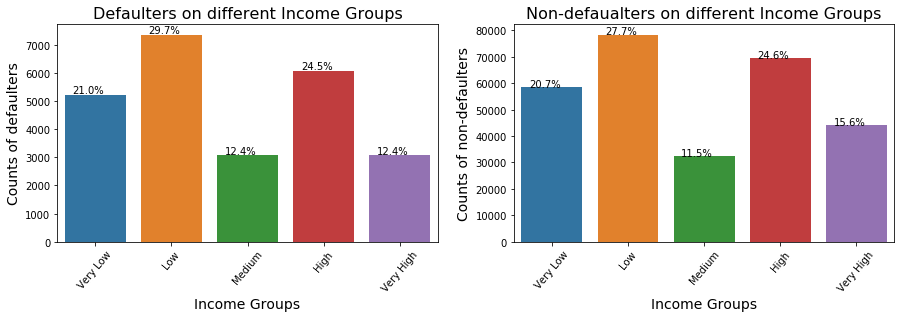

In [1014]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

# Income group wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=df_defaulters.INCOME_GROUP, data=df_defaulters, ax=ax1)

# Set the title of the defaulter's plot
ax1.set_title('Defaulters on different Income Groups',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Income Groups', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Counts of defaulters', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50)

# Annotate the percentage of each bar
for ax in ax1.patches:
        ax1.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Income group count plot for non-defaulters and place it in the second placeholder
sns.countplot(x=df_non_defaulters.INCOME_GROUP, data=df_non_defaulters, ax=ax2)

# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaualters on different Income Groups',fontsize=16)

# Rotate the labels of x-axis in non-defaulter's plot for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Income Groups', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Counts of non-defaulters', fontsize=14)

# Annotate the percentage of each bar
for ax in ax2.patches:
        ax2.annotate('{:.1f}%'.format((ax.get_height()/len(df_non_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see that very high-income group is less likely to become defaulter</li>
  <li>We can also see the trend of increasing tendency of defaulting with decreasing of income group level</li>
</ul>


<b>Family Status proportions of defaulters and non-defaulters</b>


In [1015]:
# Check the family status wise counts in current applications
current_applications.NAME_FAMILY_STATUS.value_counts()


Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [1016]:
# Check the family status wise counts of defaulters
df_defaulters.NAME_FAMILY_STATUS.value_counts()


Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64

In [1017]:
# Check the family status wise counts of non-defaulters
df_non_defaulters.NAME_FAMILY_STATUS.value_counts()


Married                 181582
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

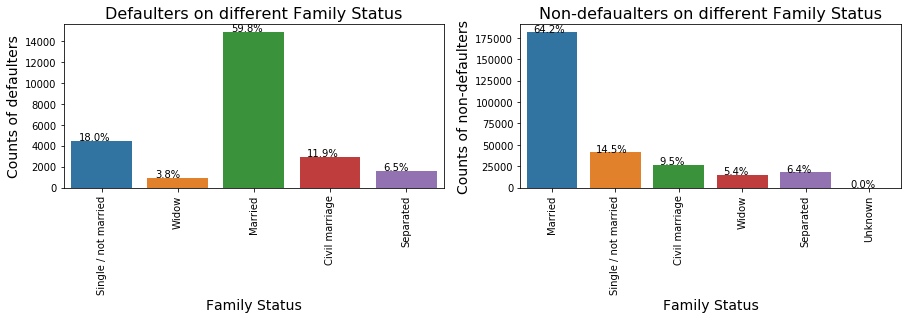

In [1018]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3))

# Family Status wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=df_defaulters.NAME_FAMILY_STATUS, data=df_defaulters, ax=ax1)

# Set the title of the defaulter's plot
ax1.set_title('Defaulters on different Family Status',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Family Status', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Counts of defaulters', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Annotate the percentage of each bar
for ax in ax1.patches:
        ax1.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Family Status count plot for non-defaulters and place it in the second placeholder
sns.countplot(x=df_non_defaulters.NAME_FAMILY_STATUS, data=df_non_defaulters, ax=ax2)

# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaualters on different Family Status',fontsize=16)

# Rotate the labels of x-axis in non-defaulter's plot for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Family Status', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Counts of non-defaulters', fontsize=14)

# Annotate the percentage of each bar
for ax in ax2.patches:
        ax2.annotate('{:.1f}%'.format((ax.get_height()/len(df_non_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see clearly that there are more married applicants than others</li>
  <li>We can see also see that Single/not married and civil marriage applicants are more likely to become defaulter. This may be due to that fact that single or non-married people are not worried of becoming defaulter as they do not have family which can go on risk due to non-payments</li>
</ul>


<b>Education Type proportions of defaulters and non-defaulters</b>


In [1019]:
# Check the education type wise counts in current applications
current_applications.NAME_EDUCATION_TYPE.value_counts()


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [1020]:
# Check the education type wise counts of defaulters
df_defaulters.NAME_EDUCATION_TYPE.value_counts()


Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

In [1021]:
# Check the education type wise counts of non-defaulters
df_non_defaulters.NAME_EDUCATION_TYPE.value_counts()


Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

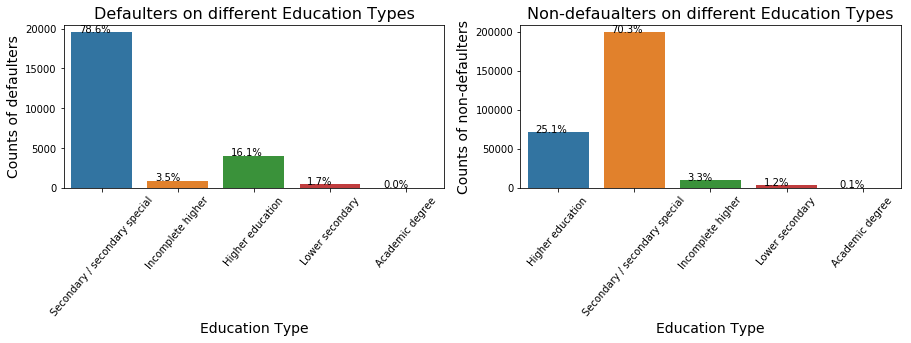

In [1022]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3))

# Type Status wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=df_defaulters.NAME_EDUCATION_TYPE, data=df_defaulters, ax=ax1)

# Set the title of the defaulter's plot
ax1.set_title('Defaulters on different Education Types',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Education Type', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Counts of defaulters', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50)

# Annotate the percentage of each bar
for ax in ax1.patches:
        ax1.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Education Type count plot for non-defaulters and place it in the second placeholder
sns.countplot(x=df_non_defaulters.NAME_EDUCATION_TYPE, data=df_non_defaulters, ax=ax2)

# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaualters on different Education Types',fontsize=16)

# Rotate the labels of x-axis in non-defaulter's plot for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Education Type', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Counts of non-defaulters', fontsize=14)

# Annotate the percentage of each bar
for ax in ax2.patches:
        ax2.annotate('{:.1f}%'.format((ax.get_height()/len(df_non_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see clearly that there are more applicants with education type of Secondary/Secondary Special</li>
  <li>We can see that applicants with higher education are less likely to default. This may be because people with higher education are having better career prospects and jobs to repay their installments</li>
  <li>We can also see that applicants from all other/lower education types are more likely to default. This may be because people with lower education are not having good jobs or career prospects which makes it bit difficult for them to repay their installments</li>
</ul>


<b>Children proportions of defaulters and non-defaulters</b>


In [1023]:
# Check the children wise counts in current applications
current_applications.CNT_CHILDREN.value_counts()


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [1024]:
# Check the children wise counts of defaulters
df_defaulters.CNT_CHILDREN.value_counts()


0     16609
1      5454
2      2333
3       358
4        55
5         7
6         6
9         2
11        1
Name: CNT_CHILDREN, dtype: int64

In [1025]:
# Check the children wise counts of non-defaulters
df_non_defaulters.CNT_CHILDREN.value_counts()


0     198762
1      55665
2      24416
3       3359
4        374
5         77
6         15
7          7
14         3
19         2
12         2
10         2
8          2
Name: CNT_CHILDREN, dtype: int64

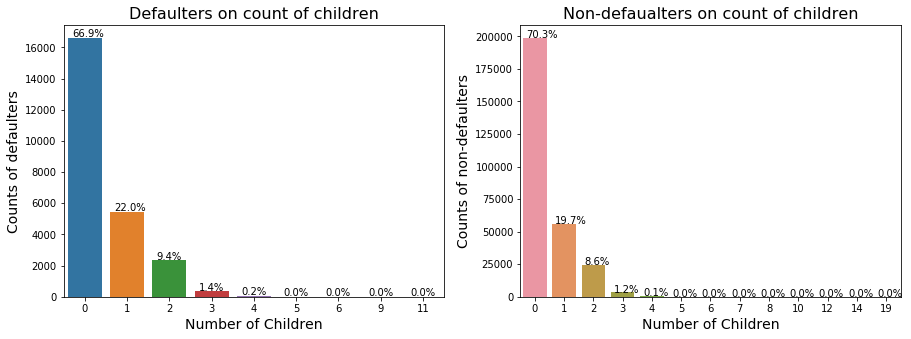

In [1026]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

# Children wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=df_defaulters.CNT_CHILDREN, data=df_defaulters, ax=ax1)

# Set the title of the defaulter's plot
ax1.set_title('Defaulters on count of children',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Number of Children', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Counts of defaulters', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Annotate the percentage of each bar
for ax in ax1.patches:
        ax1.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Children wise count plot for non-defaulters and place it in the second placeholder
sns.countplot(x=df_non_defaulters.CNT_CHILDREN, data=df_non_defaulters, ax=ax2)

# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaualters on count of children',fontsize=16)

# Rotate the labels of x-axis in non-defaulter's plot for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Number of Children', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Counts of non-defaulters', fontsize=14)

# Annotate the percentage of each bar
for ax in ax2.patches:
        ax2.annotate('{:.1f}%'.format((ax.get_height()/len(df_non_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can infer that more applications are from people without any child.
  <li>We can see that people having 1-4 children are more likely to default on their loan</li>
</ul>


<b>Type Suite proportions of defaulters and non-defaulters</b>


In [1027]:
# Check the type suite wise counts in current applications
current_applications.NAME_TYPE_SUITE.value_counts()


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [1028]:
# Check the type suite wise counts of defaulters
df_defaulters.NAME_TYPE_SUITE.value_counts()


Unaccompanied      20337
Family              3009
Spouse, partner      895
Children             241
Other_B              174
Other_A               76
Group of people       23
Name: NAME_TYPE_SUITE, dtype: int64

In [1029]:
# Check the type suite wise counts of non-defaulters
df_non_defaulters.NAME_TYPE_SUITE.value_counts()


Unaccompanied      228189
Family              37140
Spouse, partner     10475
Children             3026
Other_B              1596
Other_A               790
Group of people       248
Name: NAME_TYPE_SUITE, dtype: int64

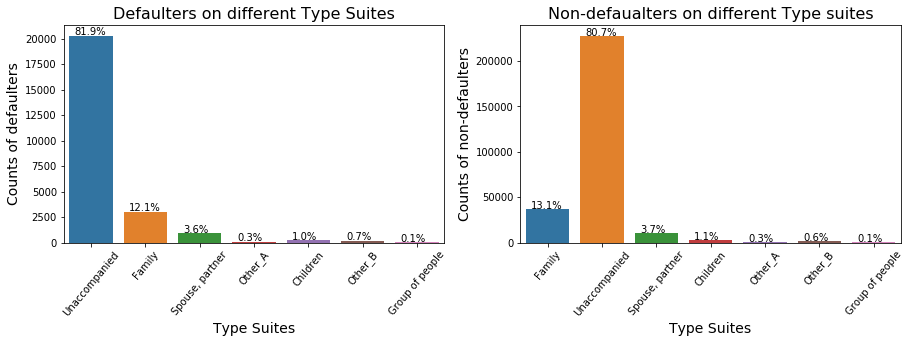

In [1030]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

# Type suite wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=df_defaulters.NAME_TYPE_SUITE, data=df_defaulters, ax=ax1)

# Set the title of the defaulter's plot
ax1.set_title('Defaulters on different Type Suites',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Type Suites', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Counts of defaulters', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50)

# Annotate the percentage of each bar
for ax in ax1.patches:
        ax1.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Type suite wise count plot for non-defaulters and place it in the second placeholder
sns.countplot(x=df_non_defaulters.NAME_TYPE_SUITE, data=df_non_defaulters, ax=ax2)

# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaualters on different Type suites',fontsize=16)

# Rotate the labels of x-axis in non-defaulter's plot for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Type Suites', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Counts of non-defaulters', fontsize=14)

# Annotate the percentage of each bar
for ax in ax2.patches:
        ax2.annotate('{:.1f}%'.format((ax.get_height()/len(df_non_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can infer that more applications are from unaccompanied people.
  <li>We can see that unaccompanied people are more likely to default on their loan</li>
  <li>We can see an interesting observation that people accompanied with family, Spouse, Partner, or children are less likely to default on their loan</li>
</ul>


<b>Housing Type proportions of defaulters and non-defaulters</b>


In [1031]:
# Check the housing type wise counts in current applications
current_applications.NAME_HOUSING_TYPE.value_counts()


House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [1032]:
# Check the housing type wise counts of defaulters
df_defaulters.NAME_HOUSING_TYPE.value_counts()


House / apartment      21272
With parents            1736
Municipal apartment      955
Rented apartment         601
Office apartment         172
Co-op apartment           89
Name: NAME_HOUSING_TYPE, dtype: int64

In [1033]:
# Check the housing type wise counts of non-defaulters
df_non_defaulters.NAME_HOUSING_TYPE.value_counts()


House / apartment      251596
With parents            13104
Municipal apartment     10228
Rented apartment         4280
Office apartment         2445
Co-op apartment          1033
Name: NAME_HOUSING_TYPE, dtype: int64

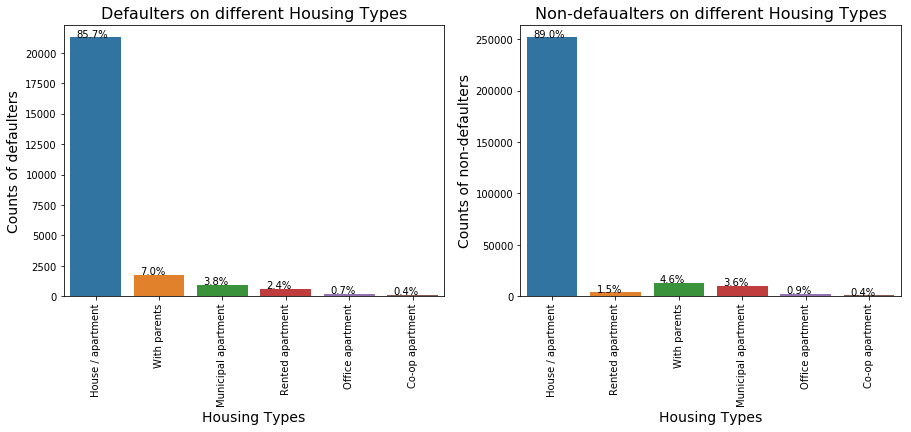

In [1034]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

# Housing Type wise count plot for defaulters and place it in the first placeholder
sns.countplot(x=df_defaulters.NAME_HOUSING_TYPE, data=df_defaulters, ax=ax1)

# Set the title of the defaulter's plot
ax1.set_title('Defaulters on different Housing Types',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Housing Types', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Counts of defaulters', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Annotate the percentage of each bar
for ax in ax1.patches:
        ax1.annotate('{:.1f}%'.format((ax.get_height()/len(df_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Housing Type wise count plot for non-defaulters and place it in the second placeholder
sns.countplot(x=df_non_defaulters.NAME_HOUSING_TYPE, data=df_non_defaulters, ax=ax2)

# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaualters on different Housing Types',fontsize=16)

# Rotate the labels of x-axis in non-defaulter's plot for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Housing Types', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Counts of non-defaulters', fontsize=14)

# Annotate the percentage of each bar
for ax in ax2.patches:
        ax2.annotate('{:.1f}%'.format((ax.get_height()/len(df_non_defaulters))*100), (ax.get_x()+0.1, ax.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can infer that more applications are from people living in their own house/apartment.
  <li>We can see that people living with parents and/or living in rented apartment are more likely to be a default</li>
</ul>


<b>Relationship between Family Size and Amount Credit among defaulters and non-defaulters</b>


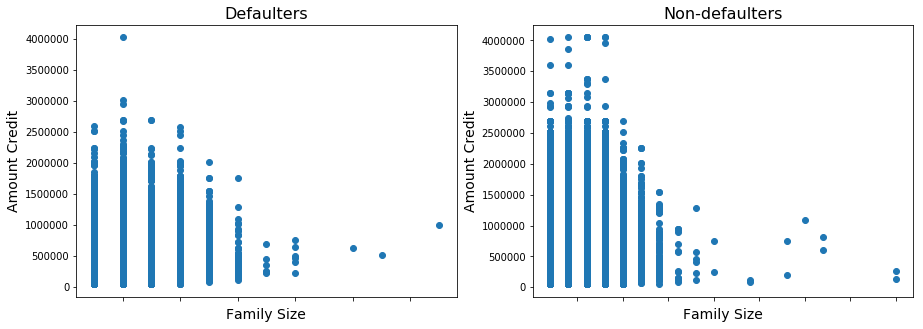

In [1035]:
# Create sublots with 2 plot placeholders
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

# Scatter plot for Relationship between Family Size and Amount Credit among defaulters and place it in the first placeholder
ax1.scatter(x='CNT_FAM_MEMBERS', y='AMT_CREDIT',data=df_defaulters)
    
# Set the title of the defaulter's plot
ax1.set_title('Defaulters',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax1.set_xlabel('Family Size', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax1.set_ylabel('Amount Credit', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50)

# Scatter plot for Relationship between Family Size and Amount Credit among non-defaulters and place it in the second placeholder
ax2.scatter(x='CNT_FAM_MEMBERS', y='AMT_CREDIT',data=df_non_defaulters)
    
# Set the title of the non-defaulter's plot
ax2.set_title('Non-defaulters',fontsize=16)

# Rotate the labels of x-axis in non-defaulter's plot for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50)

# Set the label of x-axis for non-defaulter's plot
ax2.set_xlabel('Family Size', fontsize=14)
   
# Set the label of y-axis for non-defaulter's plot
ax2.set_ylabel('Amount Credit', fontsize=14)


# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li> We can see that the applications are more from smaller family size and for low to medium amount credit</li>
  <li>We can see that people with both bigger family size and higher amount credit are less Likely to default</li>
</ul>


<b>Correlation of numeric fields in current applications</b>


In [1036]:
# Chek the top correlations in current applications
corr_current_applications=current_applications.corr()
corr_current_applications.head(10)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.002342,0.000222,0.001551,0.004851,0.001890,0.004386,0.001366,0.004588,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.160472,-0.178919,-0.009728,-0.044003,-0.009036,-0.043226,-0.009993,-0.043768,-0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,0.183395,-0.028019,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.879161,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.018015,-0.042710,0.006902,-0.009705,0.006199,-0.009550,0.006401,-0.009447,-0.008037,0.015593,-0.001262,0.015232,-0.001861,-0.005865,0.001786,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293,0.003945,-0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,0.027805,0.008506,0.000325,0.063994,-0.017193,-0.008290,0.000159,0.038378,0.016342,-0.085465,-0.091735,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,0.060925,-0.030229,0.005658,0.060171,0.005284,0.057675,0.005639,0.059682,0.041985,-0.013099,-0.013244,-0.013015,-0.013135,-0.018585,-0.001000,-0.016751,0.000529,0.001507,-0.045878,0.003825,0.072451,0.018389,0.000290,0.002315,0.002540,0.022747,0.020708,0.010793,0.007269,0.002230,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838

<Figure size 1296x720 with 0 Axes>

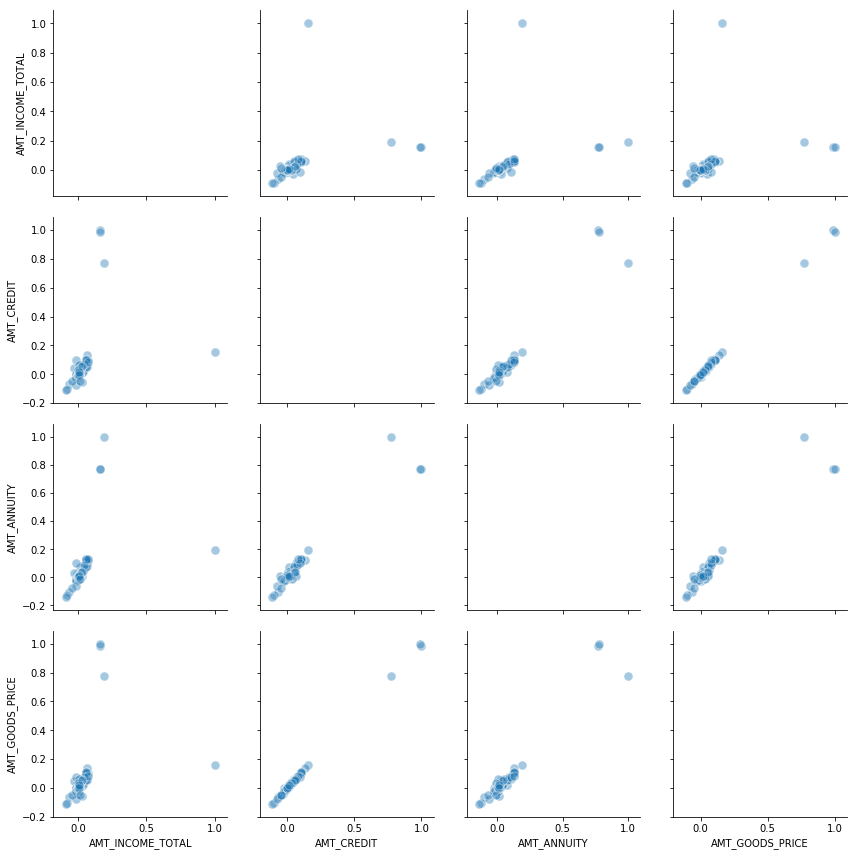

In [1037]:
# Plot a pairplot for top 4 highly corelated numeric vriables (amount fields)
plt.figure(figsize=[18,10])
sns.pairplot(corr_current_applications[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']], 
             diag_kind = 'auto', 
             plot_kws = {'alpha': 0.4, 's': 80},
             size = 3)
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can infer that higher credit amount is applied by the client for costly goods</li>
  <li>We can observe that we have week correlations between other variables and there are not any significant inferences can be drawn from them</li>
</ul>


##  Task 2: Analysing previous applications

- ### Subtask 2.1: Read the previous application Data.

    Read the previous application data file provided and store it in a dataframe `previous_applications`.

In [1038]:
# Read the previous application csv file using 'read_csv'. Store into a dataframe 'previous_applications'
previous_applications=pd.read_csv(r'C:\Users\innov\Desktop\Masters\eda_case_study\previous_application.csv')

# Inspect the dataframe
previous_applications.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [1039]:
# Check the number of rows and columns in the dataframe - previous_applications
previous_applications.shape


(1048575, 37)

In [1040]:
# Check the column-wise info of the dataframe - previous_applications
previous_applications.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
SK_ID_PREV                     1048575 non-null int64
SK_ID_CURR                     1048575 non-null int64
NAME_CONTRACT_TYPE             1048575 non-null object
AMT_ANNUITY                    815566 non-null float64
AMT_APPLICATION                1048575 non-null float64
AMT_CREDIT                     1048575 non-null float64
AMT_DOWN_PAYMENT               489179 non-null float64
AMT_GOODS_PRICE                807610 non-null float64
WEEKDAY_APPR_PROCESS_START     1048575 non-null object
HOUR_APPR_PROCESS_START        1048575 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1048575 non-null object
NFLAG_LAST_APPL_IN_DAY         1048575 non-null int64
RATE_DOWN_PAYMENT              489179 non-null float64
RATE_INTEREST_PRIMARY          3721 non-null float64
RATE_INTEREST_PRIVILEGED       3721 non-null float64
NAME_CASH_LOAN_PURPOSE         1048575 non-null object
NAME_CONTRACT

In [1041]:
# Check the summary for the numeric columns in the dataframe - previous_applications
previous_applications.describe()


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,3721.000000,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,0.187177,0.774922,-8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,0.083343,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,0.189122,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,1.000000,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


- ### Subtask 2.2: Data quality check & missing values in previous applications

    Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data quality check and finding missing values

In [1042]:
# Checking the columns having more than 50% missing values
missing_values = previous_applications.isnull().mean()*100

# Sort and verify the % of missing value columns
missing_values.sort_values(ascending=False).head(50)


RATE_INTEREST_PRIVILEGED       99.645137
RATE_INTEREST_PRIMARY          99.645137
RATE_DOWN_PAYMENT              53.348211
AMT_DOWN_PAYMENT               53.348211
NAME_TYPE_SUITE                49.127626
DAYS_TERMINATION               40.121880
NFLAG_INSURED_ON_APPROVAL      40.121880
DAYS_FIRST_DRAWING             40.121880
DAYS_FIRST_DUE                 40.121880
DAYS_LAST_DUE_1ST_VERSION      40.121880
DAYS_LAST_DUE                  40.121880
AMT_GOODS_PRICE                22.980235
AMT_ANNUITY                    22.221491
CNT_PAYMENT                    22.221205
PRODUCT_COMBINATION             0.021362
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_CREDIT                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [1043]:
# Removing all the columns having more that 50% missing values
previous_applications = previous_applications.loc[:,missing_values<=50]


In [1044]:
# Re-checking the shape of current_applications dataframe to check the number of available columns after removing columns
previous_applications.shape


(1048575, 33)

We can see the above that number of columns reduced from 37 to 33 after removing the fields having more than 50% missing values

In [1045]:
# Re-checking the columns for columns having more than 50% missing values
missing_values = previous_applications.isnull().mean()*100

# Sort and verify the % of missing value columns
missing_values.sort_values(ascending=False).head()


NAME_TYPE_SUITE              49.127626
DAYS_FIRST_DUE               40.121880
DAYS_TERMINATION             40.121880
DAYS_FIRST_DRAWING           40.121880
NFLAG_INSURED_ON_APPROVAL    40.121880
dtype: float64

As per the above inspection, we can see that now there is not any columns having more than 50% missing values. So, we are good with this now.


- ### Subtask 2.3:  Data analysis on previous applications

    Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualization to get various insights about the data.


<b>Client Type Analysis</b>

In [1046]:
# Count of all client types in previous application
previous_applications.NAME_CLIENT_TYPE.value_counts()


Repeater     771957
New          189990
Refreshed     85411
XNA            1217
Name: NAME_CLIENT_TYPE, dtype: int64

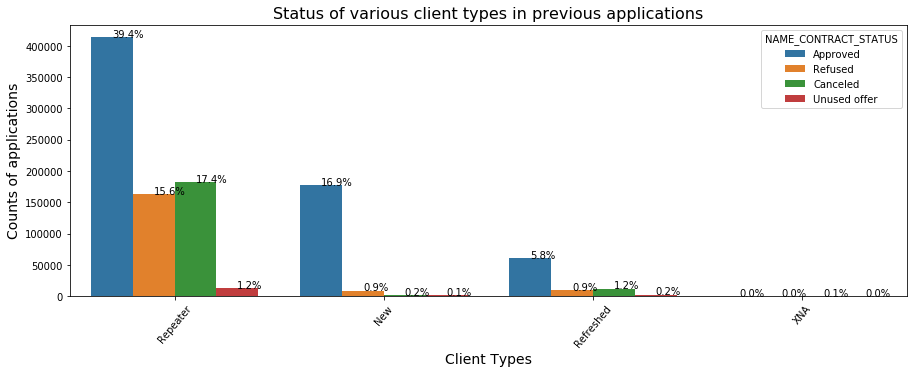

In [1047]:
# Create sublots with 1 plot placeholder
fig,ax = plt.subplots(1,1,figsize=(15,5))

# Client type wise count plot from previous applications
sns.countplot(x=previous_applications.NAME_CLIENT_TYPE, data=previous_applications, hue='NAME_CONTRACT_STATUS')

# Set the title of the defaulter's plot
ax.set_title('Status of various client types in previous applications',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax.set_xlabel('Client Types', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax.set_ylabel('Counts of applications', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

# Annotate the percentage of each bar
for a in ax.patches:
        ax.annotate('{:.1f}%'.format((a.get_height()/len(previous_applications))*100), (a.get_x()+0.1, a.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see that the applications are more from repeater customers</li>
  <li>We can also see that the repeater client applications are having more refusal and cancelation cases</li>
  <li>We can observe that the new client applications are having more approvals comparatively</li>
</ul>


<b>Payment Type Analysis</b>

In [1048]:
# Count of all payment types in previous application
previous_applications.NAME_PAYMENT_TYPE.value_counts()


Cash through the bank                        650604
XNA                                          392061
Non-cash from your account                     5233
Cashless from the account of the employer       677
Name: NAME_PAYMENT_TYPE, dtype: int64

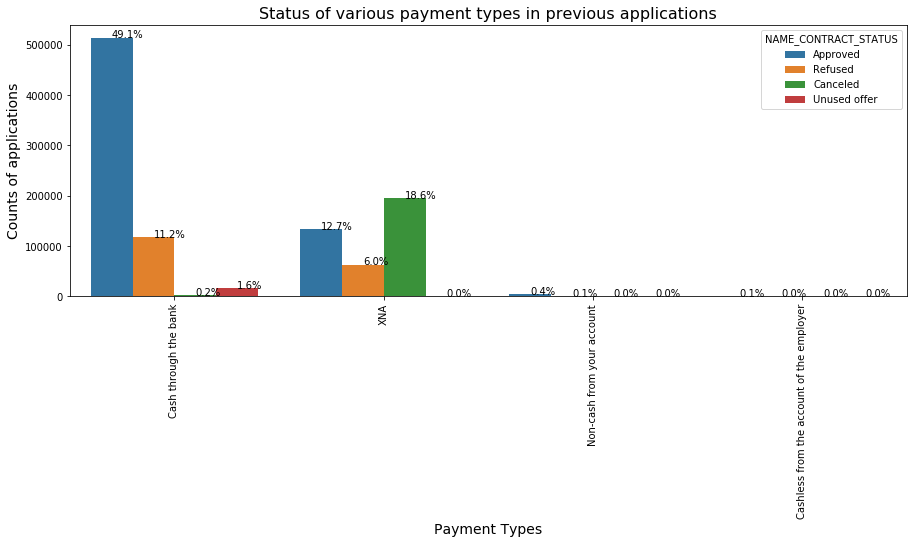

In [1049]:
# Create sublots with 1 plot placeholder
fig,ax = plt.subplots(1,1,figsize=(15,5))

# Payment type wise count plot from previous applications
sns.countplot(x=previous_applications.NAME_PAYMENT_TYPE, data=previous_applications, hue='NAME_CONTRACT_STATUS')

# Set the title of the defaulter's plot
ax.set_title('Status of various payment types in previous applications',fontsize=16)

# Set the label of x-axis for defaulter's plot
ax.set_xlabel('Payment Types', fontsize=14)
   
# Set the label of y-axis for defaulter's plot
ax.set_ylabel('Counts of applications', fontsize=14)

# Rotate the labels of x-axis in defaulter's plot for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Annotate the percentage of each bar
for a in ax.patches:
        ax.annotate('{:.1f}%'.format((a.get_height()/len(previous_applications))*100), (a.get_x()+0.1, a.get_height()+50))

# Show the plot to remove the unwanated metadata
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see that the payment types are more from cash through bank. We can observe that cancellation rate is exceptionally low for this mode of payment</li>
  <li>We can also see that other payment types are not much used by the clients</li>
</ul>


<b>Bivariate analysis on previous applications</b>


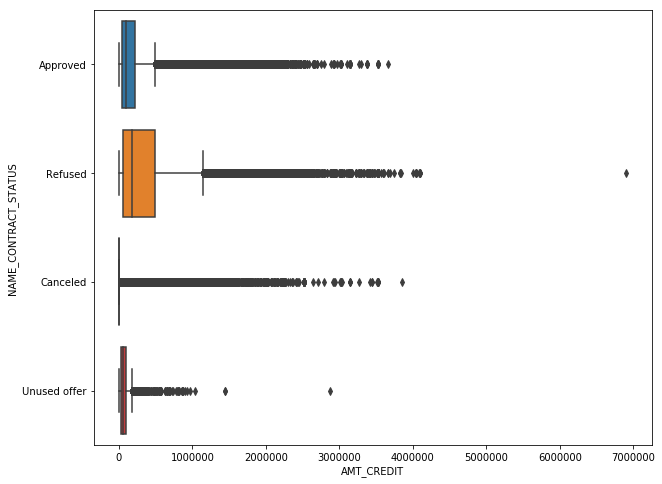

In [1050]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
sns.boxplot(x=previous_applications.AMT_CREDIT,y=previous_applications.NAME_CONTRACT_STATUS, data=previous_applications)
ax.set_xlabel('AMT_CREDIT')
ax.set_ylabel('NAME_CONTRACT_STATUS')
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can infer that the application gets cancelled when the credit amount is too low</li>
  <li>We can observe that that most applications get refused if the credit amount is too high</li>
</ul>


<b>Correlation of numeric fields in previous applications</b>


In [1051]:
# Chek the top correlations in previous applications
corr_previous_applications=previous_applications.corr()
corr_previous_applications.head(10)


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,0.000282,0.010379,0.002319,0.002710,0.013953,-0.002973,-0.003193,0.016653,-0.000547,0.013523,-0.001916,0.000397,0.002245,0.001469,0.001628,0.003536
SK_ID_CURR,0.000282,1.000000,0.001330,0.002248,0.002347,0.002442,0.002559,0.000085,-0.000299,0.001095,0.001306,-0.001375,0.001552,0.001604,0.001101,0.000691,0.000648
AMT_ANNUITY,0.010379,0.001330,1.000000,0.808841,0.816037,0.820840,-0.036402,0.020574,0.277360,-0.013897,0.393593,0.052182,-0.054177,-0.068995,0.082231,0.067730,0.282570
AMT_APPLICATION,0.002319,0.002248,0.808841,1.000000,0.975777,0.999888,-0.015063,0.004064,0.133063,-0.006703,0.680530,0.073907,-0.049857,-0.084641,0.172021,0.147995,0.259439
AMT_CREDIT,0.002710,0.002347,0.816037,0.975777,1.000000,0.993112,-0.021828,-0.025635,0.133297,-0.008462,0.674065,-0.037240,0.002247,0.043805,0.223995,0.213626,0.264234
AMT_GOODS_PRICE,0.013953,0.002442,0.820840,0.999888,0.993112,1.000000,-0.046199,-0.017536,0.289011,-0.014059,0.672116,-0.024563,-0.021526,0.016382,0.210732,0.208270,0.243824
HOUR_APPR_PROCESS_START,-0.002973,0.002559,-0.036402,-0.015063,-0.021828,-0.046199,1.000000,0.006192,-0.039973,0.015419,-0.056410,0.014857,-0.001590,-0.015973,-0.017806,-0.018242,-0.117116
NFLAG_LAST_APPL_IN_DAY,-0.003193,0.000085,0.020574,0.004064,-0.025635,-0.017536,0.006192,1.000000,0.016887,0.000855,0.063854,-0.000304,-0.000652,-0.001092,-0.002010,-0.000877,-0.007335
DAYS_DECISION,0.016653,-0.000299,0.277360,0.133063,0.133297,0.289011,-0.039973,0.016887,1.000000,-0.016515,0.244119,-0.012455,0.176252,0.089692,0.448717,0.400770,-0.029104
SELLERPLACE_AREA,-0.000547,0.001095,-0.013897,-0.006703,-0.008462,-0.014059,0.015419,0.000855,-0.016515,1.000000,-0.008634,0.006668,-0.002052,-0.006796,-0.005260,-0.005630,-0.016566


<Figure size 1296x720 with 0 Axes>

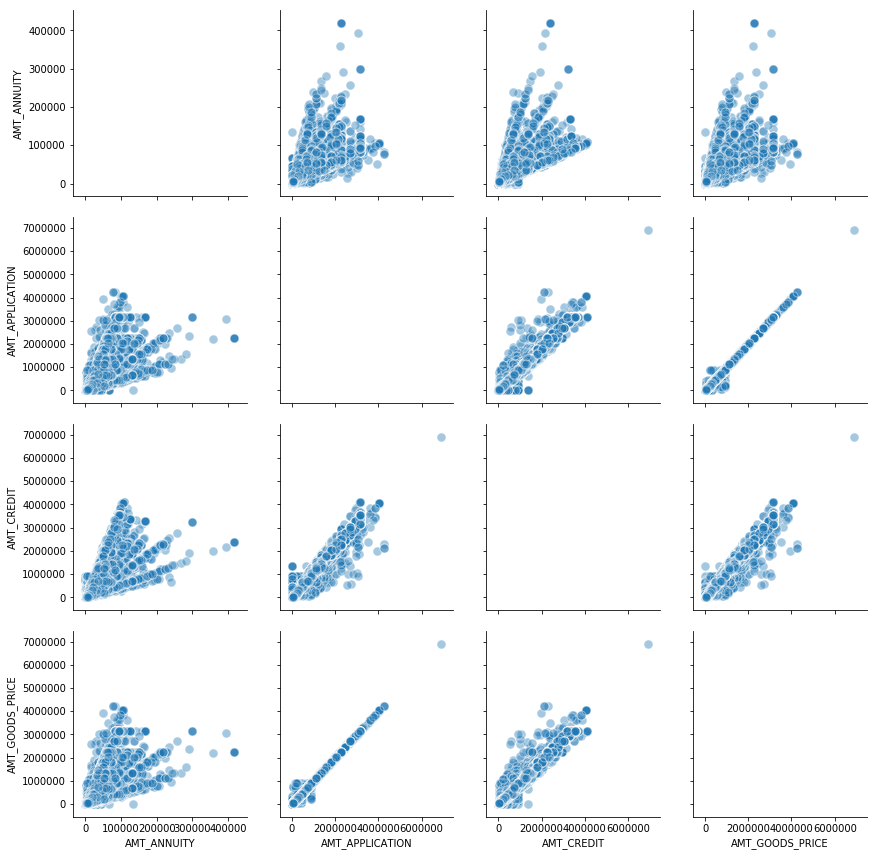

In [1052]:
# Plot a pairplot for top 4 highly corelated numeric vriables (amount fields)
plt.figure(figsize=[18,10])
sns.pairplot(previous_applications[['AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']], 
             diag_kind = 'auto', 
             plot_kws = {'alpha': 0.4, 's': 80},
             size = 3)
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can infer that higher credit amount was applied by the client for costly goods</li>
  <li>We can also observe that higher application amount was also for costly goods</li>
  <li>We can see that the annuity amount is having same trend across other variables</li>
    
</ul>


##  Task 3: Analysing the combined data from both current and previous applications


- ### Subtask 3.1: Merge the current and previous applications.

    Merge the current and previous applications data frames and store it in a dataframe `merged_applications`.


In [1053]:
# Merge the current and previous applications data frames and store it in a dataframe - merged_applications
merged_applications = pd.merge(current_applications, previous_applications, on=['SK_ID_CURR'], how='left')


In [1054]:
# Inspect the dataframe
merged_applications.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"(20, 30]",High,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(40, 50]",Very High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(40, 50]",Very High,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash throu

In [1055]:
# Check the size of merged applications
merged_applications.shape


(932527, 115)

We can see that columns got merged from both dataframes. 82 columns from current applications and 33 columns from previous applications


<b>Analysing Target Vs Contract Status</b>


In [1056]:
# Create a pivote table to get the grouped count for status in both defaulter and non-defaulter categories
defaulter_status_pivot = merged_applications.pivot_table(values='SK_ID_CURR', index='TARGET', columns='NAME_CONTRACT_STATUS', aggfunc='count')
defaulter_status_pivot


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
TARGET,,,,
0,515220,146729,135396,13217
1,42313,14823,18463,1186


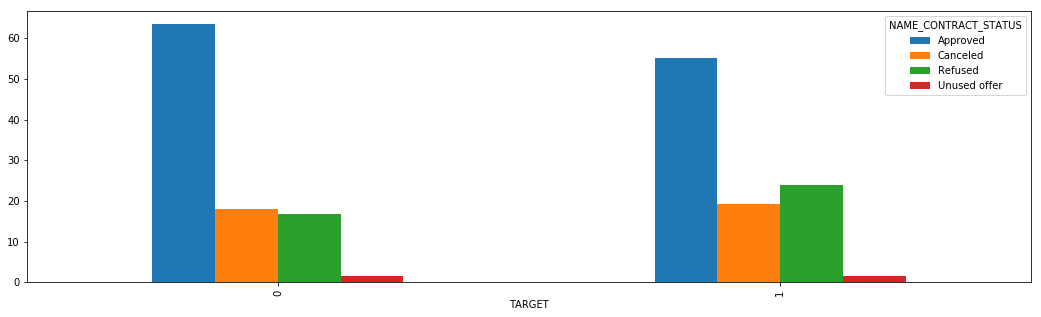

In [1057]:
# Calculate the percentage of the sum of all status for every category (defaulters & non-defaulters)
defaulter_status_pivot = defaulter_status_pivot.div(defaulter_status_pivot.sum(axis=1), axis='rows')*100

# Plot the bar plot and specify the figure size for better visibility
defaulter_status_pivot.plot.bar(figsize=[18,5])

# Show the plot
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see that the clients who had their previous application approved are less likely to be a defaulter</li>
  <li>We can also observe that the clients who had their most of earlier applications refused are more likely to be a defaulter</li>
</ul>


<b>Analysing Gender Vs Contract Status</b>


In [1058]:
# Create a pivote table to get the grouped count for status in both defaulter and non-defaulter categories
gender_status_pivot = merged_applications.pivot_table(values='SK_ID_CURR', index='CODE_GENDER', columns='NAME_CONTRACT_STATUS', aggfunc='count')
gender_status_pivot


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
CODE_GENDER,,,,
Female,376881.0,111406.0,102405.0,9013.0
Male,180635.0,50142.0,51438.0,5390.0
XNA,17.0,4.0,16.0,NaN


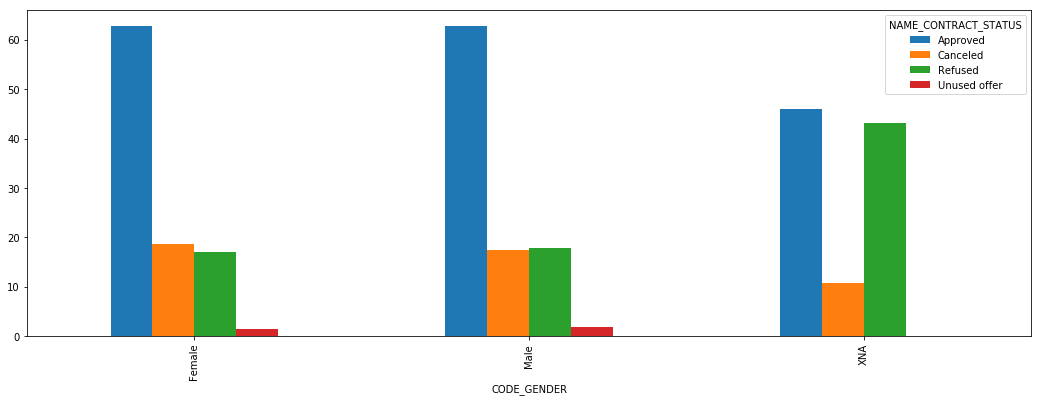

In [1059]:
# Calculate the percentage of the sum of all status for every category (defaulters & non-defaulters)
gender_status_pivot = gender_status_pivot.div(gender_status_pivot.sum(axis=1), axis='rows')*100

# Plot the bar plot and specify the figure size for better visibility
gender_status_pivot.plot.bar(figsize=[18,6])

# Show the plot
plt.show()


<i>Inferences:</i>
<ul>
  <li>We can see that the females are having more cancelled applications than males, whereas males are having more refused applications than females</li>
  <li>We can also observe that the gender is having no significant impact on the approval status</li>
</ul>
